<a href="https://colab.research.google.com/github/sazeib/data_science_visualisation/blob/main/Data_Visualisation_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation for Breast Cancer
> Using dataset downloaded from kaggle.com
---

# Breast Cancer Dataset
Binary Classification Prediction for type of Breast Cancer


## About Dataset
### Description:
Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

### Acknowledgements:
This dataset has been referred from Kaggle.

### Objective:
Understand the Dataset & cleanup (if required).
Build classification models to predict whether the cancer type is Malignant or Benign.
Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.

### URL
> https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

---

## Step 1: Initial setup
#### Add Python libraries required for data manipulation and visualisation
- pandas
- pyplot
- seaborn

In [14]:
import pandas as pd  # Python's data analysis and manipulation tool
pd.plotting.register_matplotlib_converters
import matplotlib.pyplot as plt  # provide an implicit, MATLAB-like, way of plotting
# enable rendering/interacting of Matplotlib plots directly in the notebook or shell output, such as zooming, panning, and saving
%matplotlib inline
import seaborn as sns
print("Setup complete")

Setup complete


In [20]:
# pwd
!wget https://github.com/sazeib/data_science_visualisation/raw/refs/heads/main/Dataset/breast-cancer.csv
# get the gitgub link address by right-clicking the raw file once the file is open in github

--2025-06-19 06:23:34--  https://github.com/sazeib/data_science_visualisation/raw/refs/heads/main/Dataset/breast-cancer.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sazeib/data_science_visualisation/refs/heads/main/Dataset/breast-cancer.csv [following]
--2025-06-19 06:23:35--  https://raw.githubusercontent.com/sazeib/data_science_visualisation/refs/heads/main/Dataset/breast-cancer.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124571 (122K) [text/plain]
Saving to: ‘breast-cancer.csv’

breast-cancer.csv   100%[===================>] 121.65K  --.-KB/s    in 0.01s   

2025-06-19 06:23:35

---

## Step 2: Specify the filepath

In [21]:
# Path of the CSV file to read
# b_cancer_filepath = "./Dataset/breast-cancer.csv"
b_cancer_filepath = "breast-cancer.csv"

---

## Step 3: Load the data

In [23]:
# Load the CSV file into a Pnadas dataset
b_cancer_data = pd.read_csv(b_cancer_filepath, index_col='id') # with setting the 'id' columns as index

In [24]:
# To examine the data, print the first 5 rows of the dataset
b_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
# Print statistics info of the dataset
print("Shape:", b_cancer_data.shape) # Row x Columns
print("Size:", b_cancer_data.size) # Total number of cells
print("Columns:", list(b_cancer_data.columns))
#print("Info:", b_cancer_data.info) # information about a DataFrame including the index dtype and columns, non-null values and memory usage
#print("Describe:", b_cancer_data.describe) # descriptive statistics

Shape: (569, 31)
Size: 17639
Columns: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


---

## Plot the data

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


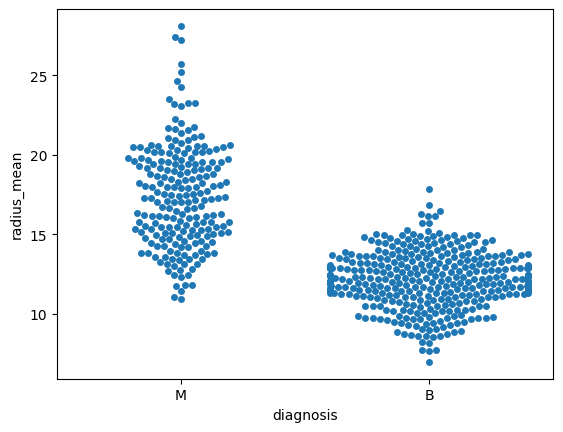

In [26]:
# swarm plot using radius
sns.swarmplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_mean']) # using radius_mean
#sns.swarmplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_worst']) # using radius_worst
#sns.swarmplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_se']) # using radius_se

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

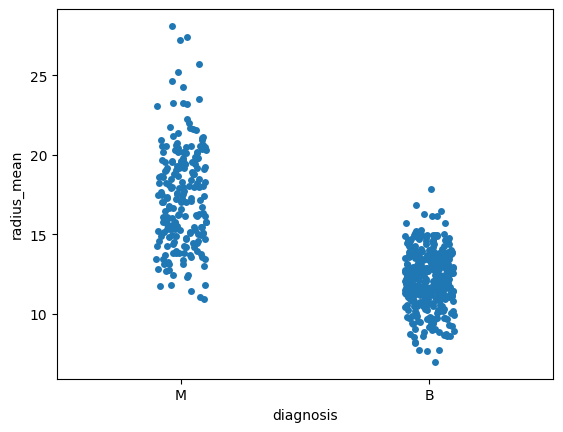

In [27]:
# strip plot using radius
sns.stripplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_mean']) # using radius_mean
#sns.stripplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_worst']) # using radius_worst
#sns.stripplot(x=b_cancer_data['diagnosis'], y=b_cancer_data['radius_se']) # using radius_se

## Create a subset of the dataset keeping only the mean values

In [28]:
# copy only the mean values into a new dataset. No need to mention the index column because index will be automatically included in the new dataset
b_cancer_data_means = b_cancer_data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
b_cancer_data_means.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Plot the mean data into histogram chart

<Axes: xlabel='area_mean', ylabel='Count'>

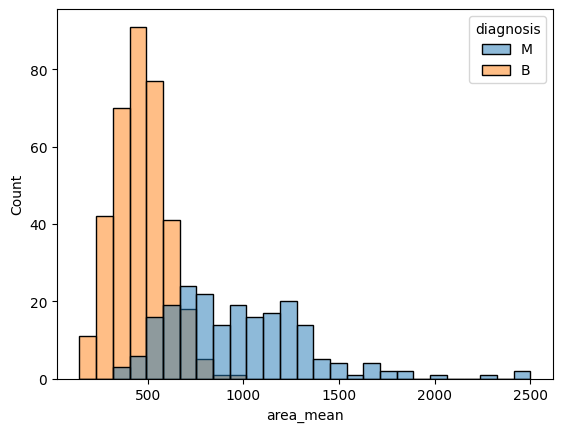

In [29]:
# plot the mean data into histogram
#sns.histplot(data=b_cancer_data_means, x='radius_mean', hue='diagnosis')              # radius > 15 should be taken seriously as it can be malignant
#sns.histplot(data=b_cancer_data_means, x='texture_mean', hue='diagnosis')             # does not seem to be useful for diagnosis
#sns.histplot(data=b_cancer_data_means, x='perimeter_mean', hue='diagnosis')           # radius 100+ should be taken seriously as it can be malignant
sns.histplot(data=b_cancer_data_means, x='area_mean', hue='diagnosis')                # radius 800+ should be taken seriously as it can be malignant
#sns.histplot(data=b_cancer_data_means, x='smoothness_mean', hue='diagnosis')          # does NOT seem useful all for diagnosis
#sns.histplot(data=b_cancer_data_means, x='compactness_mean', hue='diagnosis')         # radius 0.15+ should be taken seriously as it can be malignant
#sns.histplot(data=b_cancer_data_means, x='concavity_mean', hue='diagnosis')           # radius > 0.1 should be taken seriously as it can be malignant
#sns.histplot(data=b_cancer_data_means, x='concave points_mean', hue='diagnosis')      # radius 0.050+ should be taken seriously as it can be malignant
#sns.histplot(data=b_cancer_data_means, x='symmetry_mean', hue='diagnosis')            # does NOT seem useful all for diagnosis
#sns.histplot(data=b_cancer_data_means, x='fractal_dimension_mean', hue='diagnosis')  # does NOT seem useful all for diagnosis

## Plot the mean data into KDE chart

/tmp/ipython-input-30-942252815.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=b_cancer_data_means, x='fractal_dimension_mean', hue='diagnosis', shade=True)


<Axes: xlabel='fractal_dimension_mean', ylabel='Density'>

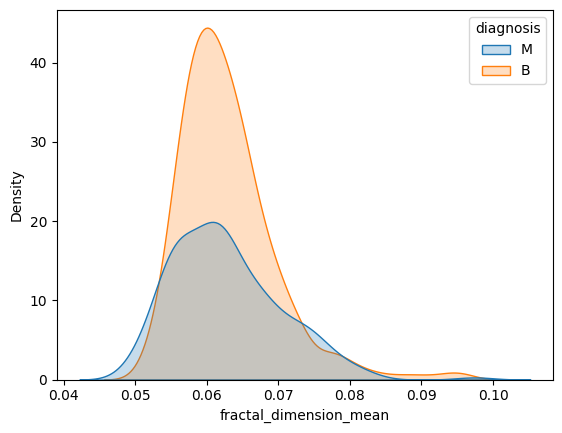

In [30]:
# plot the mean data into histogram
#sns.kdeplot(data=b_cancer_data_means, x='radius_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='texture_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='perimeter_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='area_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='smoothness_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='compactness_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='concavity_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='concave points_mean', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_means, x='symmetry_mean', hue='diagnosis', shade=True)
sns.kdeplot(data=b_cancer_data_means, x='fractal_dimension_mean', hue='diagnosis', shade=True)

## Create a subset of the dataset keeping only the worst values

In [31]:
# copy only the mean values into a new dataset. No need to mention the index column because index will be automatically included in the new dataset
b_cancer_data_worsts = b_cancer_data[['diagnosis', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
b_cancer_data_worsts.head()

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,
842302,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Plot the worst data into histogram chart

<Axes: xlabel='area_worst', ylabel='Count'>

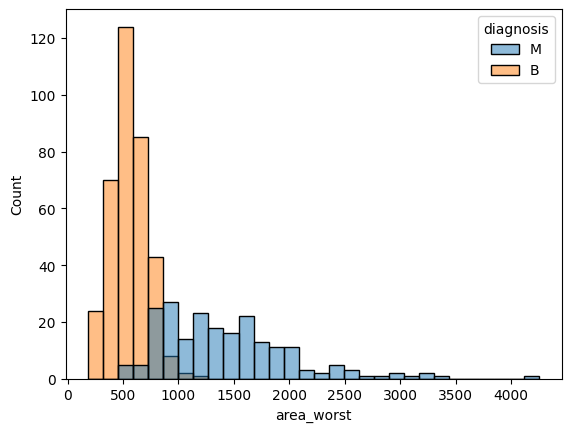

In [32]:
# plot the worst data into histogram
#sns.histplot(data=b_cancer_data_worsts, x='radius_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='texture_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='perimeter_worst', hue='diagnosis')
sns.histplot(data=b_cancer_data_worsts, x='area_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='smoothness_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='compactness_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='concavity_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='concave points_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='symmetry_worst', hue='diagnosis')
#sns.histplot(data=b_cancer_data_worsts, x='fractal_dimension_worst', hue='diagnosis')

## Plot the worst data into KDE chart

/tmp/ipython-input-33-2760230751.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=b_cancer_data_worsts, x='radius_worst', hue='diagnosis', shade=True)


<Axes: xlabel='radius_worst', ylabel='Density'>

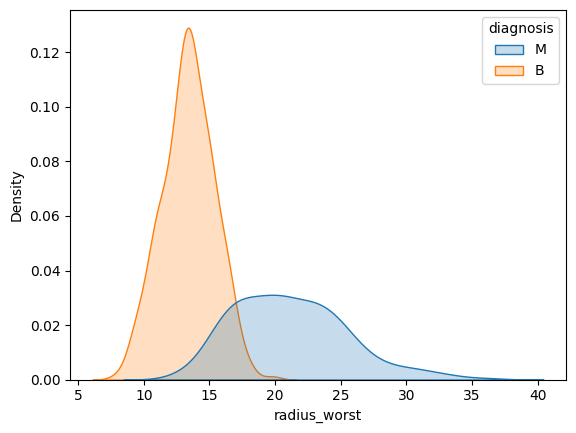

In [33]:
# plot the worst data into histogram
sns.kdeplot(data=b_cancer_data_worsts, x='radius_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='texture_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='perimeter_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='area_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='smoothness_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='compactness_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='concavity_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='concave points_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='symmetry_worst', hue='diagnosis', shade=True)
#sns.kdeplot(data=b_cancer_data_worsts, x='fractal_dimension_worst', hue='diagnosis', shade=True)